<a href="https://colab.research.google.com/github/ismailali121/Airbnb-EDA-Capstone-Project/blob/main/airbnb_booking_analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Booking Analysis



##### **Project Type**    - Python/Exploratory Data Analysis
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**



**Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data data that can be analysed and used for security, business decisions, understanding of customers' and providers (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.**

#### **Define Your Business Objective?**

*Answer* Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## **Getting the Data and Importing Libraries**

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [3]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Module 1 - Python for Data Science/EDA Project AirBnb Booking Analysis/Airbnb NYC 2019.csv')

## **Lets have a look of complete Dataset !!**

In [5]:
# Showing the first five rows of our dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [6]:
# Checking the size of our dataset
df.shape

(48895, 16)

Our data has 16 columns and 48895 rows at present

### Dataset Information

In [7]:
# Getting basic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## **Cleaning the Dataset**

#### Duplicate Values

In [8]:
# Checking if there are any duplicates in our dataset
df[df.duplicated()].count()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

As we can see from above, There are No duplicates in our dataset

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are **10052** null values in last_review and reviews_per_month.

Lets replace reviews_per_month with 0 as It might be possible that these Stays might not have been rated at all.

last_review is a date field and replacing this with any random date would corrupt the dataset.

In [10]:
# Handling Null values
df.fillna({'reviews_per_month':0},inplace=True)

In [11]:
# Rechecking the null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns

In [13]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The Minimum price cannot be zero. This might be duw to human error. So, lets drop rows with price as zero.

In [14]:
# Dropping the rows with price values zero.
df.drop(df[df.price==0].index,inplace=True)

In [15]:
# Rechecking the dataset describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **Number of properties in each Neighbourhood Group**

Text(0.5, 1.0, 'Number of properties in each Neighbourhood Group')

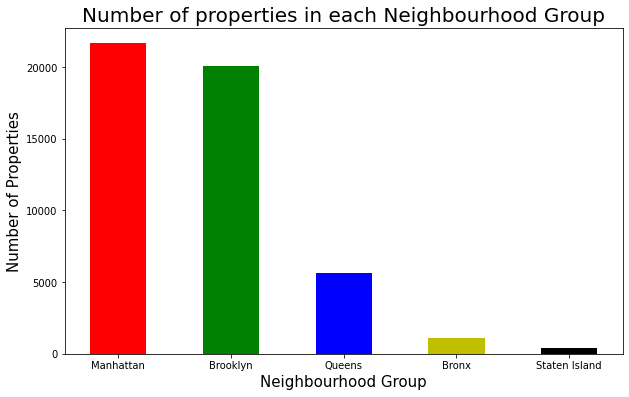

In [19]:
# Finding the number of properties in each neighbourhood group using graph
prop_count=df['neighbourhood_group'].value_counts().reset_index()

plt.figure(figsize=(10,6))

plt.bar(prop_count['index'],prop_count['neighbourhood_group'],0.5,color=['r','g','b','y','k'])

plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Properties',size=15)
plt.title('Number of properties in each Neighbourhood Group',size=20)

It can be understood from above graph that most number of properties are present in **Manhattan**

# **Number of Reviews in each Neighbourhood group**

Text(0.5, 1.0, 'Number of Reviews in each Neighbourhood Group')

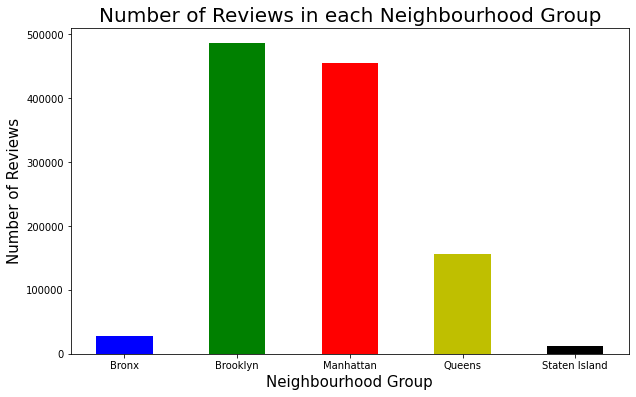

In [20]:
# Finding the number of reviews in each neighbourhood group using graph
reviews_count=df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
reviews_count
plt.figure(figsize=(10,6))

plt.bar(reviews_count['neighbourhood_group'],reviews_count['number_of_reviews'],0.5,color=['b','g','r','y','k'])

plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Reviews',size=15)
plt.title('Number of Reviews in each Neighbourhood Group',size=20)

**Brooklyn and Manhattan are the Most reviewed Neighbourhood Groups, where as Bronx and Staten Island are least**

It can also be infered that if number of reviews are more, it means more people must be visiting the properties in these neighbourhood groups.

So **Brooklyn** and **Manhattan** must be the Most Busiest Neighbourhood Groups.

# **Number of Properties by Room Type**

Text(0.5, -0.1, 'Number of Properties by Room Type')

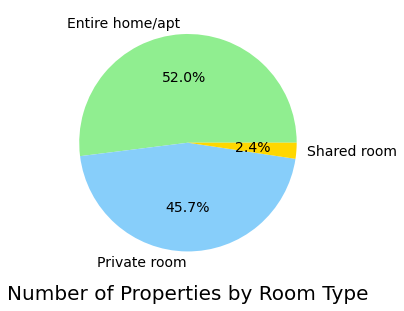

In [21]:
count_by_roomtype=df.groupby('room_type')['host_id'].count().reset_index()
count_by_roomtype
plt.figure(figsize=(5,5))

plt.pie(count_by_roomtype['host_id'],labels=count_by_roomtype['room_type'],colors=['lightgreen','lightskyblue','gold'],textprops={'fontsize': 14},autopct='%1.1f%%')

plt.title('Number of Properties by Room Type',y=-0.1,size=20)

From the above chart it can be observed that, Most Properties offer **Entire home or apartment** 

# **Minimun Nights offered by different Properties**

In [22]:
# Function to Categorize minimum_nights
def minimum_nights_cat(min_nights):
  if min_nights==1:
    return '1 Day'
  elif min_nights>1 and min_nights<7:
    return 'Less than a Week'
  elif min_nights==1:
    return '1 week'  
  elif min_nights>1 and min_nights<30:
    return 'Less than a Month'
  elif min_nights==30:
    return '1 Month'
  elif min_nights>30 and min_nights<180:
    return 'Less than 6 Months'
  elif min_nights==180:
    return '6 Months'
  elif min_nights>180 and min_nights<365:
    return 'Less than 1 Year'
  elif min_nights==365:
    return '1 Year'
  else:
    return 'More than 1 Year'

df['minimum_nights_category']=df['minimum_nights'].apply(lambda x: minimum_nights_cat(x))

Text(0.5, 1.0, 'Minimun Nights Category')

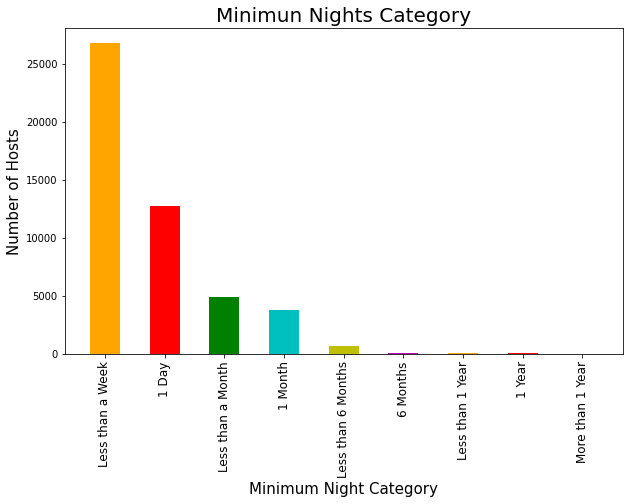

In [23]:
#Categorizing the minimum_nights into few segments
min_nights_category_df=df.groupby('minimum_nights_category')['host_id'].count().sort_values(ascending=False).reset_index()
min_nights_category_df

plt.figure(figsize=(10,6))
plt.bar(min_nights_category_df['minimum_nights_category'],min_nights_category_df['host_id'],0.5,color=['orange','r','g','c','y','m'])

plt.xlabel('Minimum Night Category',size=15)
plt.ylabel('Number of Hosts',size=15)
plt.xticks(rotation=90,fontsize=12)
plt.title('Minimun Nights Category',size=20)

We can say that, Most Hosts pefer minimum nights to be paid for **Less than a Week** or **1 day**

# **Which Month most people checked out of the properties in 2019?**

This datset contains data of year 2019. Mostly people give reviews during their checkout from property.

Last_review can be inferred as the date when customer left the property.

Text(0.5, 1.0, 'Last Review date month wise')

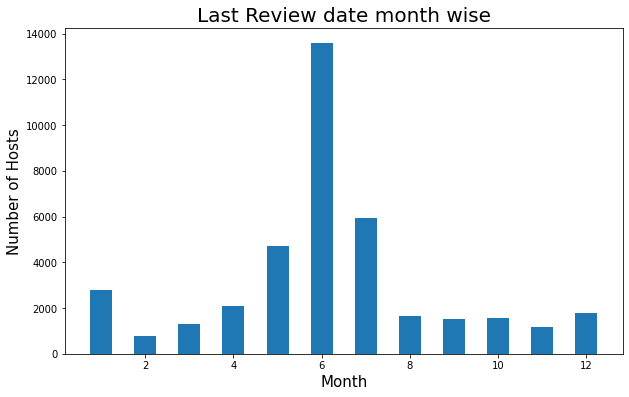

In [24]:
# Getting month from last_review date
df['last_review']=pd.to_datetime(df['last_review'], format='%Y-%m-%d')
df['last_review_month']=df['last_review'].apply(lambda x: x.month)

last_month=df.groupby('last_review_month')['host_id'].count().reset_index()

plt.figure(figsize=(10,6))
plt.bar(last_month['last_review_month'],last_month['host_id'],0.5)

plt.xlabel('Month',size=15)
plt.ylabel('Number of Hosts',size=15)
# plt.xticks(rotation=90,fontsize=12)
plt.title('Last Review date month wise',size=20)

It can be observed that in the year 2019, Most people checked out/changed there Stay in the **6th month** (June Month)

# **Comparision of Demand and Supply of Hosts in each Neighbourhood Group**

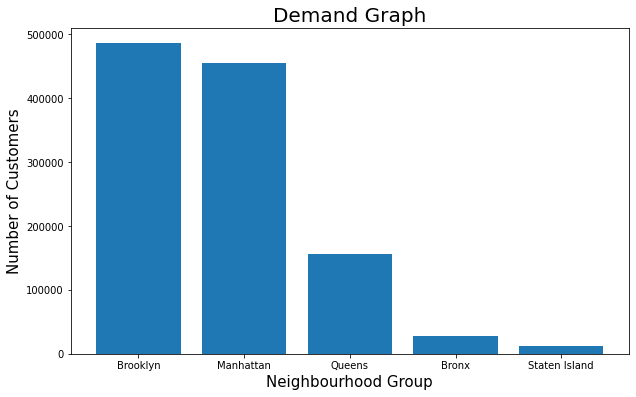

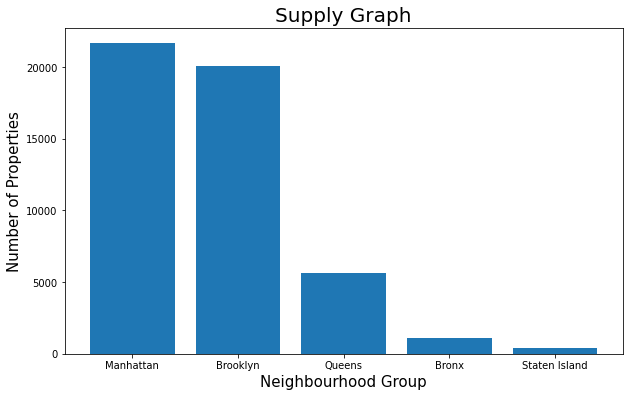

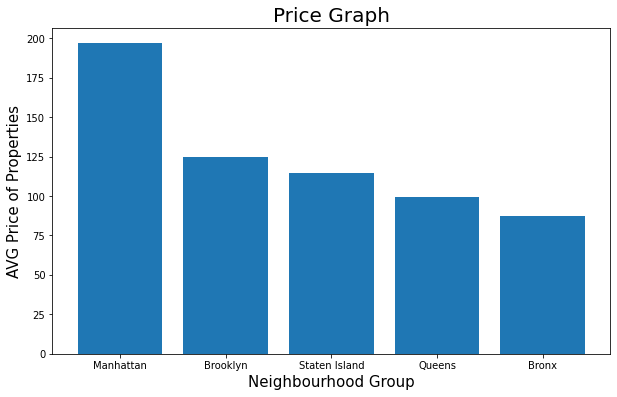

In [49]:
# number_of_reviews gives us the count of people stayed in that Neighbourhood Group
demand_df=df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).reset_index()

# number of hosts in a Neighbourhood Group will tell us about the supply in that Neighbourhood Group
supply_df=df.groupby('neighbourhood_group')['host_id'].count().sort_values(ascending=False).reset_index()

# calculating the avg price in each Neighbourhood Group
avg_price_df=df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (10, 6)

# Demand Graph
plt.bar(demand_df['neighbourhood_group'],demand_df['number_of_reviews'])
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Customers',size=15)
plt.title('Demand Graph',size=20)
plt.show()

# Supply Graph
plt.bar(supply_df['neighbourhood_group'],supply_df['host_id'])
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Properties',size=15)
plt.title('Supply Graph',size=20)
plt.show()

# Price Graph
plt.bar(avg_price_df['neighbourhood_group'],avg_price_df['price'])
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('AVG Price of Properties',size=15)
plt.title('Price Graph',size=20)
plt.show()

The Highest number of customers are in **Brooklyn**, But the Highest number of Properties are present in **Manhattan**.

So it can be suggested to Increase the number of properties in **Brooklyn** to increase profits as there is **High Demand**.

# **Number of Properties by Room Type in each Neighbourhood Group**

Text(0.5, 1.0, 'Properties by Room Type in each Neighbourhood Group')

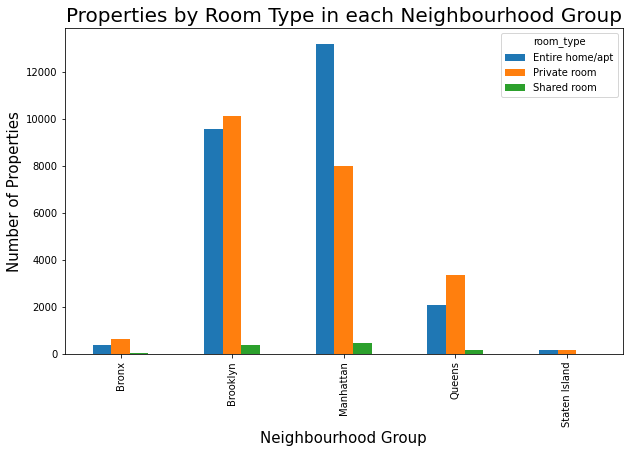

In [62]:
# Grouping hosts by both neighbourhood_group and room_type
types_by_neighbourhood=df.groupby(['neighbourhood_group','room_type'])['host_id'].count().unstack()

types_by_neighbourhood.plot.bar()
plt.xlabel('Neighbourhood Group',size=15)
plt.ylabel('Number of Properties',size=15)
plt.title('Properties by Room Type in each Neighbourhood Group',size=20)

From the above plot we can conclude that **Manhattan** and **Brooklyn** have the highest number of Entire home/apt Type of properties. This can be due to more number of families travelling to these places, they mignt want the entire home to themselves.

There are very few **shared rooms** in almost all Neighbourhood groups. 

ssd

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***